In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading dataframe
df = pd.read_csv("D:\Supermarket_data\supermarket_sales - Sheet1.csv")
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
#Checking unique values for branch column
df['Branch'].unique()

array(['A', 'C', 'B'], dtype=object)

In [4]:
#Checking null values
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [5]:
#Get a summary about every column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

A    339
B    330
C    322
Name: Branch, dtype: int64


<AxesSubplot:xlabel='Branch', ylabel='Count'>

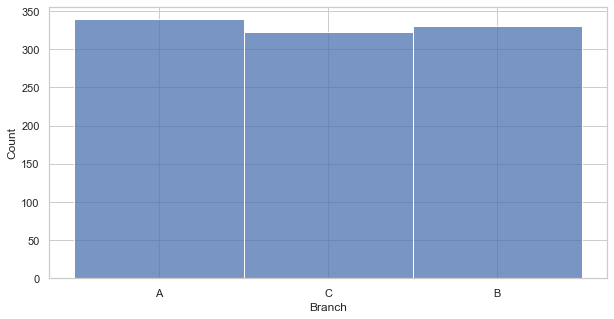

In [93]:
#Histogram to show customer at every branch
print(df.Branch.value_counts())
plt.figure(figsize=(10,5))
sns.set_theme(style="whitegrid")
sns.histplot(x='Branch',data = df)

Member    501
Normal    499
Name: Customer type, dtype: int64


<AxesSubplot:xlabel='Customer type', ylabel='Count'>

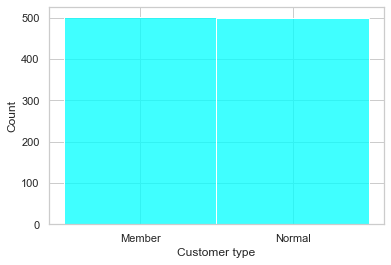

In [7]:
#Histogram for showing customer type
print(df["Customer type"].value_counts())
sns.histplot(x= 'Customer type',data = df,color='cyan')

Fashion accessories       175
Food and beverages        173
Electronic accessories    170
Sports and travel         165
Home and lifestyle        156
Health and beauty         152
Name: Product line, dtype: int64


<AxesSubplot:xlabel='Product line', ylabel='Count'>

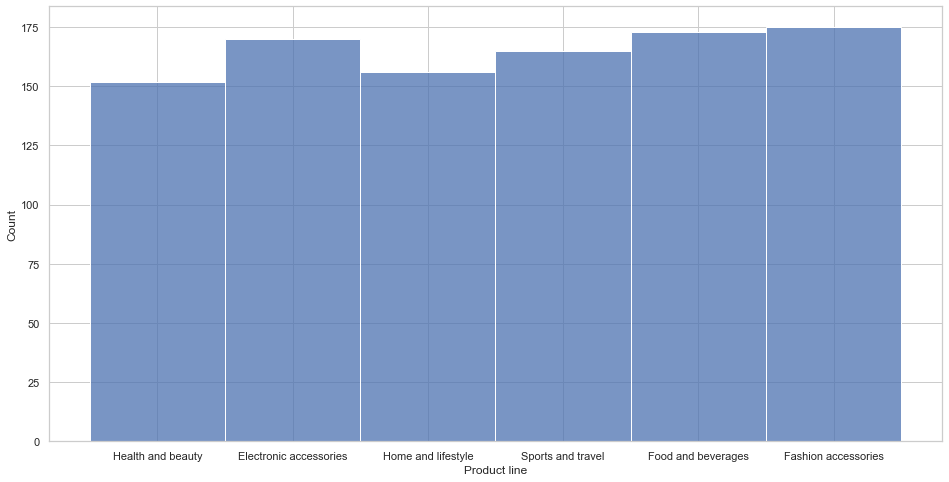

In [92]:
#Graph to show customercount as per product category
print(df['Product line'].value_counts())
plt.figure(figsize=(16,8))
sns.set_theme(style="whitegrid")
sns.histplot(x='Product line',data=df)

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64


<AxesSubplot:xlabel='Payment', ylabel='Count'>

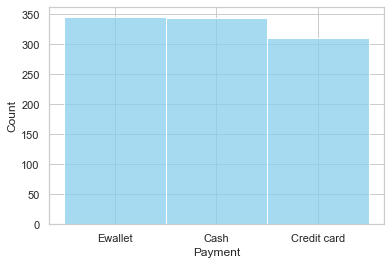

In [9]:
#Count of customers as per payment type
print(df["Payment"].value_counts())
sns.set_theme(style="whitegrid")
sns.histplot(x='Payment',data = df,color='skyblue')

In [10]:
#Getting series for Health and beauty product only
df2 = df[df['Product line']=="Health and beauty"]

In [84]:
#Average rating of store given by male and female
df.groupby(['Branch','Gender']).Rating.mean()

Branch  Gender
A       Female    6.839130
        Male      7.187640
B       Female    6.904375
        Male      6.762353
C       Female    7.178736
        Male      6.979730
Name: Rating, dtype: float64

In [85]:
#Average of spending by male and female on every store
df.groupby(['Branch','Gender']).Total.mean()

Branch  Gender
A       Female    330.864391
        Male      291.527604
B       Female    318.021375
        Male      313.349276
C       Female    330.951310
        Male      316.593943
Name: Total, dtype: float64

In [86]:
#Average quantity of products purcahse by male and female at each branch
df.groupby(['Branch','Gender']).Quantity.mean()

Branch  Gender
A       Female    5.645963
        Male      5.280899
B       Female    5.568750
        Male      5.347059
C       Female    5.798851
        Male      5.148649
Name: Quantity, dtype: float64

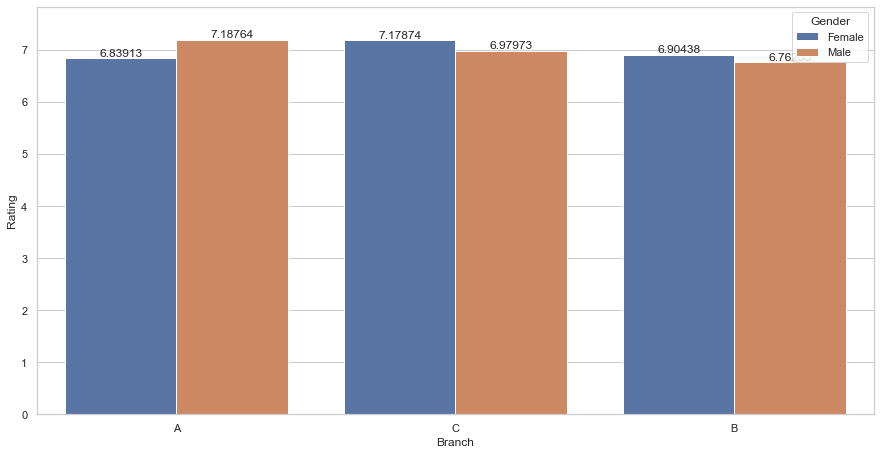

In [91]:
#Graphical representation of average rating of store given by male and female
plt.figure(figsize=(15,7.5))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x = 'Branch', y = 'Rating', hue = 'Gender', data = df,errwidth=0)

for i in ax.containers:
    ax.bar_label(i,)
plt.show()    

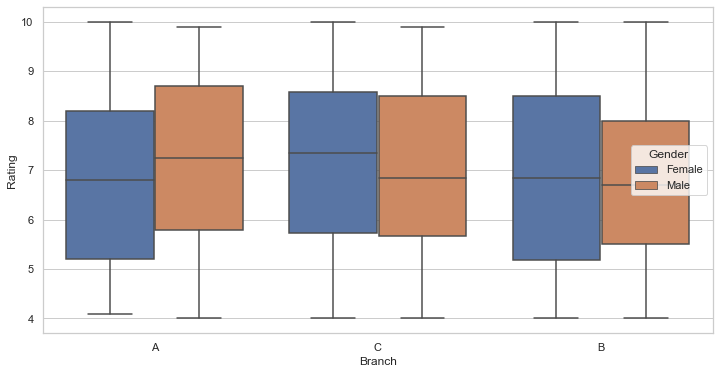

In [90]:
#Box plot to show average rating of store given by male and female
plt.figure(figsize=(12,6))
ax = sns.boxplot(x = 'Branch', y = 'Rating', hue = 'Gender', data = df)
plt.show()    

In [17]:
df['Time'].dtypes

dtype('O')

In [18]:
#Total worth of product sold by every branch
df.groupby('Branch').cogs.sum()

Branch
A    101143.21
B    101140.64
C    105303.53
Name: cogs, dtype: float64

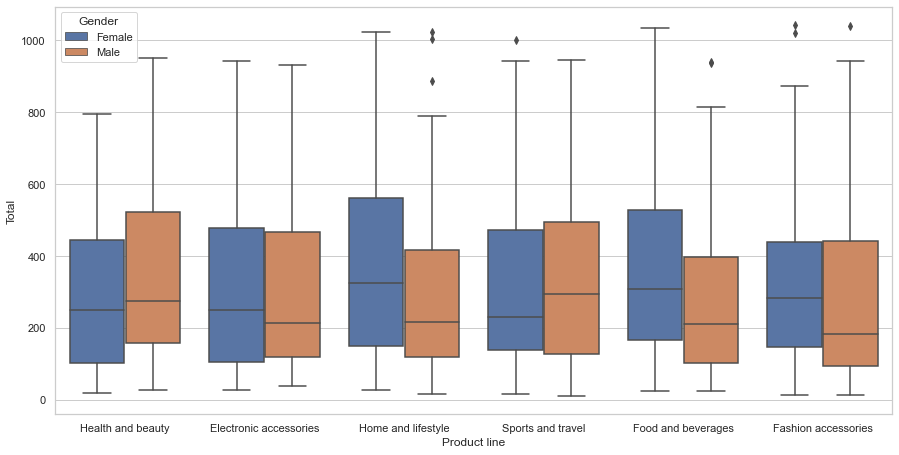

In [19]:
#Box plot for product type representationa and to check outliers
plt.figure(figsize=(15,7.5))
ax = sns.boxplot(x = 'Product line', y = 'Total', hue = 'Gender', data = df)
plt.show()      

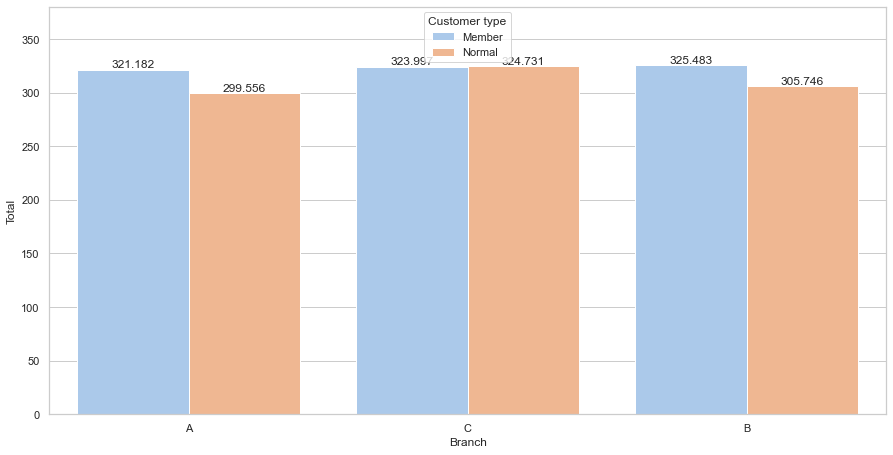

In [88]:
#Box plot between branch and total spending as per customer type
plt.figure(figsize=(15,7.5))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x = 'Branch', y = 'Total',hue= 'Customer type',data = df,palette="pastel",errwidth=0)

for i in ax.containers:
    ax.bar_label(i,)
plt.show()    
    

In [21]:
#Split date column into three different column
df[["month", "date", "year"]] = df["Date"].str.split("/", expand = True)

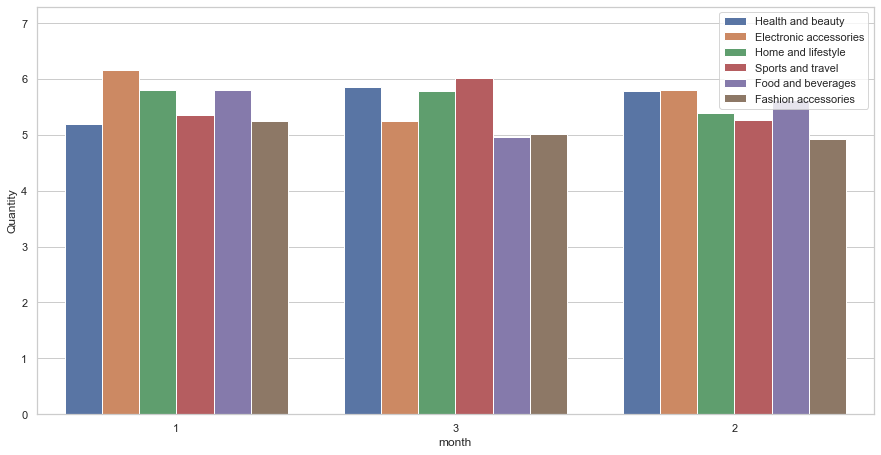

In [22]:
#Bar graph between month and quantity as per product line
plt.figure(figsize=(15,7.5))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x = 'month', y = 'Quantity',hue='Product line', data = df,errwidth=0)
plt.legend(loc='upper right')
plt.show()

By looking at this figure we can indicate that in third month there is a more sell of sports and travel things so we have to ensure that in third month we have enough stocks to fulfill the needs of customer.For electronic accessories and food and beverages we can see a decline over the months.

In [23]:
df.month.value_counts()

1    352
3    345
2    303
Name: month, dtype: int64

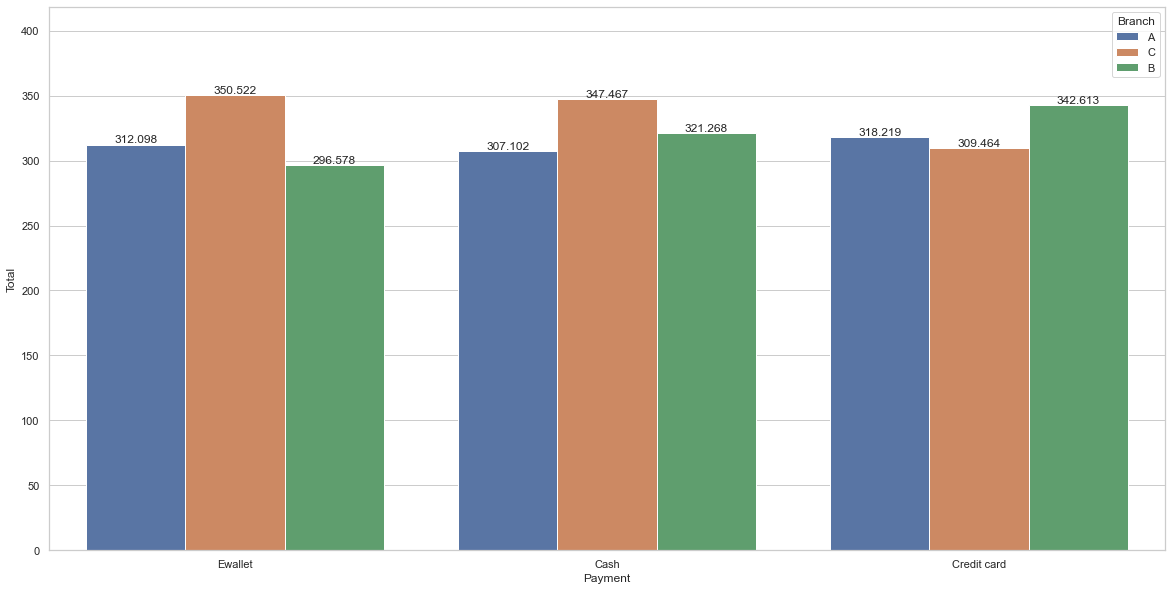

In [24]:
#bar graph between payment type and total bill as per branch 
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x = 'Payment', y = 'Total',hue='Branch', data = df,errwidth=0)

for i in ax.containers:
    ax.bar_label(i,)
plt.show()    

In [25]:
#create df by sort values by date column
df2 = df.sort_values(by=['Date'])

In [26]:
df2.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,month,date,year
496,556-97-7101,C,Naypyitaw,Normal,Female,Electronic accessories,63.22,2,6.322,132.762,1/1/2019,15:51,Cash,126.44,4.761905,6.322,8.5,1,1,2019
484,493-65-6248,C,Naypyitaw,Member,Female,Sports and travel,36.98,10,18.490,388.290,1/1/2019,19:48,Credit card,369.80,4.761905,18.490,7.0,1,1,2019
567,651-88-7328,A,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,1/1/2019,13:55,Cash,591.66,4.761905,29.583,7.7,1,1,2019
523,133-14-7229,C,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.287,132.027,1/1/2019,11:43,Cash,125.74,4.761905,6.287,5.0,1,1,2019
970,746-04-1077,B,Mandalay,Member,Female,Food and beverages,84.63,10,42.315,888.615,1/1/2019,11:36,Credit card,846.30,4.761905,42.315,9.0,1,1,2019


In [27]:
#Getting total sum by month and assign new index to series
df2_total_month = df2.groupby('month').Total.sum()
month_name = pd.Series(['Jan','Feb','March'])
df2_total_month.index = month_name
print(df2_total_month.index)

Index(['Jan', 'Feb', 'March'], dtype='object')


In [28]:
#Per day average total sell by month
for index, item in enumerate(df2_total_month):
    if index == 'Jan' or index == 'March':
        print(index,item/31)
    else:
        print(index,item/28)

0 4153.281
1 3472.1205
2 3909.12525


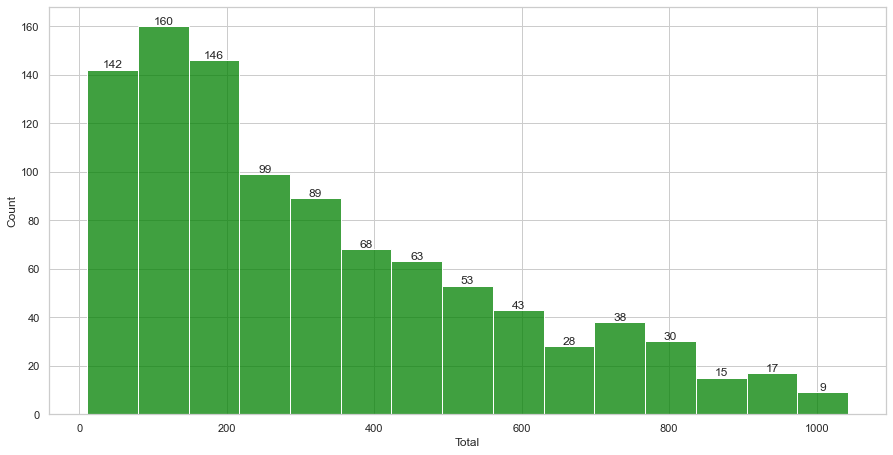

In [29]:
#Showing trend of Total bill
plt.figure(figsize=(15,7.5))
sns.set_theme(style="whitegrid")
ax = sns.histplot(x='Total',data=df,color='green')
for i in ax.containers:
    ax.bar_label(i,)

<AxesSubplot:xlabel='Total', ylabel='Product line'>

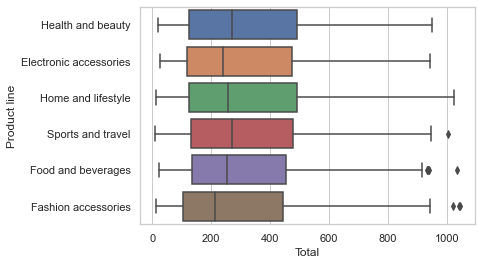

In [30]:
#Box plot between total and product line to check for outliers
sns.boxplot(x = 'Total',y='Product line',data = df)

Old total:  0       548.9715
1        80.2200
2       340.5255
3       489.0480
4       634.3785
         ...    
995      42.3675
996    1022.4900
997      33.4320
998      69.1110
999     649.2990
Name: Total, Length: 1000, dtype: float64
New Shape:  (991, 20)


<AxesSubplot:xlabel='Total'>

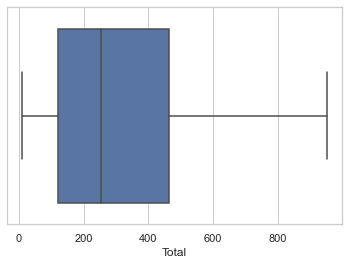

In [31]:
#Removing Outliers in total column
Q1 = np.percentile(df['Total'], 25,
                interpolation = 'midpoint')
  
Q3 = np.percentile(df['Total'], 75,
                interpolation = 'midpoint')
IQR = Q3 - Q1
  
print("Old total: ", df.Total)

upper = np.where(df['Total'] >= (Q3+1.5*IQR))
  
# Lower bound
lower = np.where(df['Total'] <= (Q1-1.5*IQR))
  
# Removing the Outliers
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
  
print("New Shape: ", df.shape)
  
sns.boxplot(x='Total', data=df)

<AxesSubplot:xlabel='Total', ylabel='Product line'>

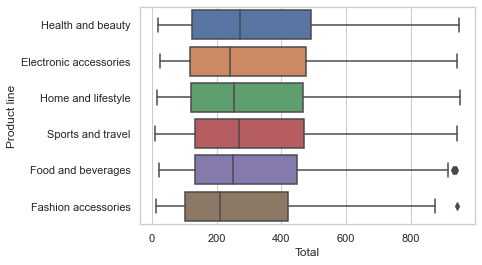

In [32]:
#Box plot between total and product type after removing outliers
sns.boxplot(x = 'Total',y='Product line',data = df)

In [94]:
#Gross income/Profit for every branch
Gross_income = df.groupby('Branch').agg(Branch_income=('gross income','sum'))
Gross_income['Branch']=Gross_income.index
Gross_income

,Branch_income,Branch
Branch,,
A,5007.6705,A
B,4959.6570,B
C,4973.4015,C


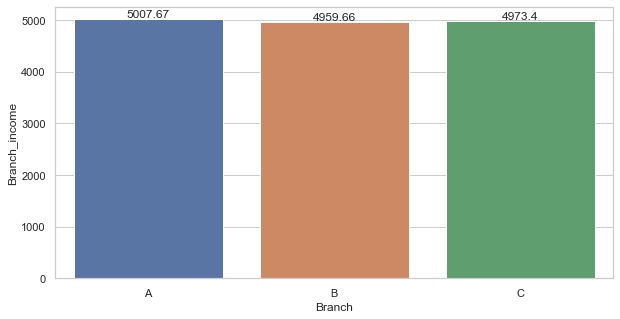

In [34]:
#Bar plot between branch and Income
plt.figure(figsize=(10,5))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x='Branch',y='Branch_income',data=Gross_income)
for i in ax.containers:
    ax.bar_label(i,)

In [35]:
#Adding date and time column
date_time = df['Date']+' '+df['Time']

In [36]:
#Adding new column in dataframe
df['date_time']=date_time

In [37]:
#Changing date_time column into datetime type
df['date_time'] = pd.to_datetime(df.date_time)

In [38]:
#Getting weekdays
weekday = df.date_time.dt.day_name()

In [39]:
#Adding new column in dataframe
df['weekday']=weekday

<AxesSubplot:xlabel='weekday', ylabel='count'>

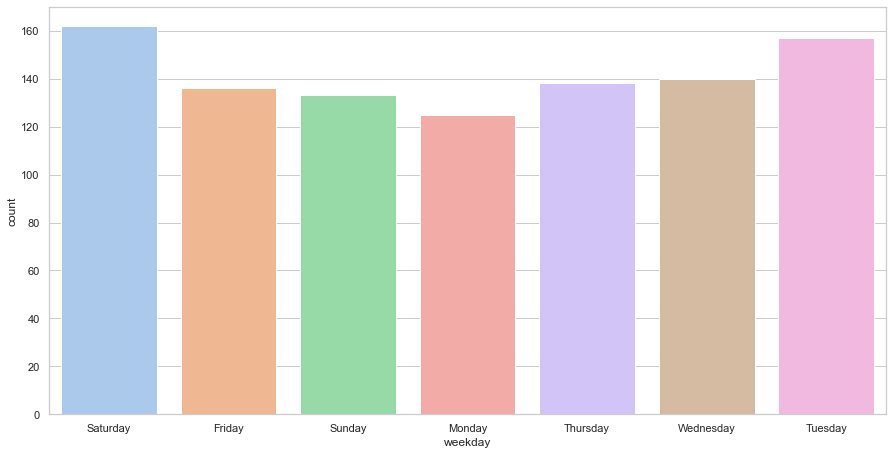

In [113]:
#No. of customer every day on stores
plt.figure(figsize=(15,7.5))
sns.set_theme(style="whitegrid")
sns.countplot(x='weekday',data=df,palette='pastel')

<AxesSubplot:xlabel='weekday', ylabel='Total'>

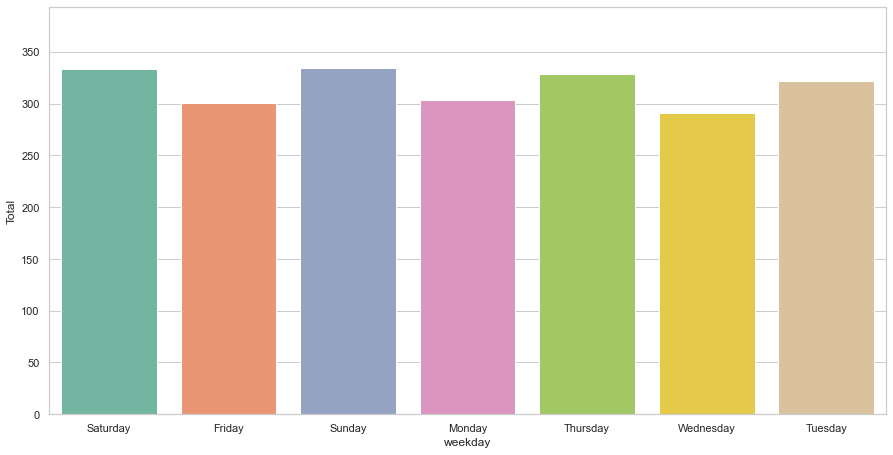

In [112]:
plt.figure(figsize=(15,7.5))
sns.barplot(x='weekday',y='Total',data = df,palette='Set2',errwidth=0)

In [61]:
#Change time column as datetime type
df['Time'] = pd.to_datetime(df['Time'],format='%Y/%m/%d %H:%M:%S.%f').dt.time

In [62]:
#Change time column as str 
df['Time']=df['Time'].astype(str)

In [63]:
#Change time column into timedelta for calulation
df['Time'] = pd.to_timedelta(df.Time)

In [69]:
#Average time spend by customer on every branch
df.groupby('Branch').Time.mean()

Branch
A   0 days 00:15:08.530973451
B   0 days 00:15:40.309090909
C   0 days 00:15:25.618012422
Name: Time, dtype: timedelta64[ns]

In [74]:
#Average time spend by male and female on every branch by product type 
df.groupby(['Branch','Gender','Product line']).Time.mean()

Branch  Gender  Product line          
A       Female  Electronic accessories   0 days 00:14:23.607142857
                Fashion accessories      0 days 00:14:32.607142857
                Food and beverages       0 days 00:14:26.782608695
                Health and beauty        0 days 00:15:36.714285714
                Home and lifestyle          0 days 00:15:20.343750
                Sports and travel        0 days 00:14:42.586206896
        Male    Electronic accessories      0 days 00:15:41.593750
                Fashion accessories      0 days 00:15:08.318181818
                Food and beverages       0 days 00:16:10.257142857
                Health and beauty        0 days 00:15:50.576923076
                Home and lifestyle       0 days 00:14:21.878787878
                Sports and travel           0 days 00:15:16.500000
B       Female  Electronic accessories   0 days 00:15:40.535714285
                Fashion accessories      0 days 00:15:52.727272727
                Food an

In [83]:
# No. of Customer who spend more than average in store
df[df['Total']>df['Total'].mean()].shape

(401, 22)

In [81]:
#No. of customer who take more than average time to shop
df[df['Time']>df['Time'].mean()].shape

(490, 22)